<function matplotlib.pyplot.show(close=None, block=None)>

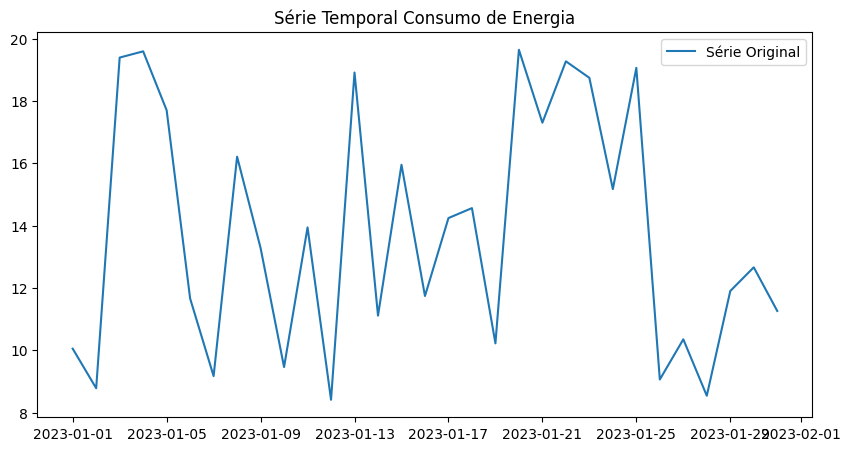

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

dados = pd.read_csv('consumo_energia.csv', parse_dates=['Data'], index_col = 'Data')

series = dados['Consumo (kWh)']

#Visualização da série teporal
plt.figure(figsize=(10,5))
plt.plot(series,label='Série Original')
plt.title('Série Temporal Consumo de Energia')
plt.legend()
plt.show



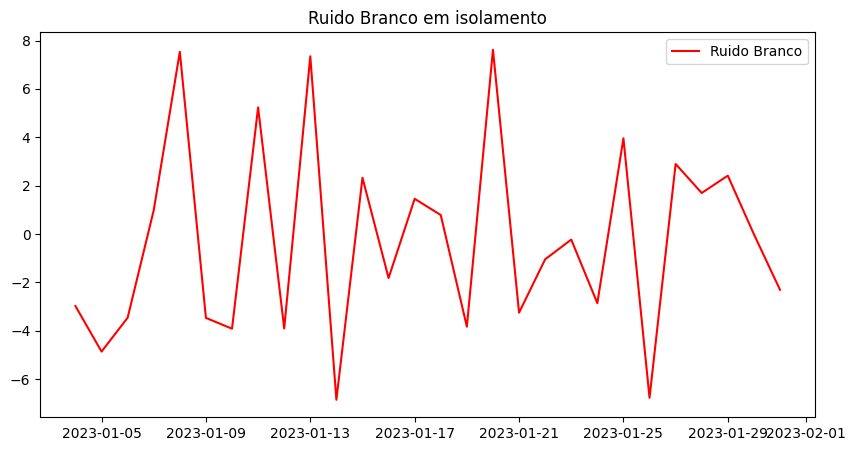

In [19]:
series_diff = series.diff().dropna()
ruido_branco = series_diff - series_diff.rolling(window=3).mean()
plt.figure(figsize=(10,5))
plt.plot(ruido_branco,color='red',label='Ruido Branco')
plt.title('Ruido Branco em isolamento')
plt.legend()
plt.show()

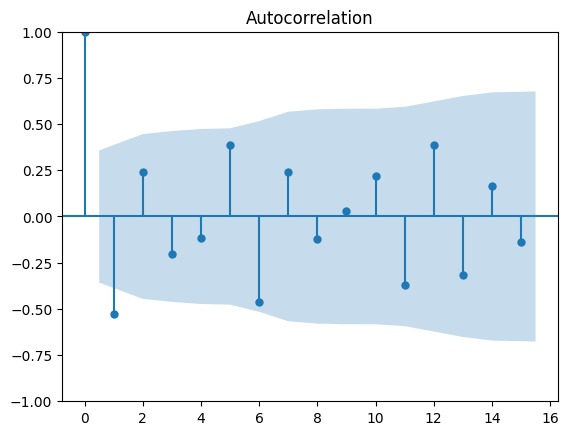

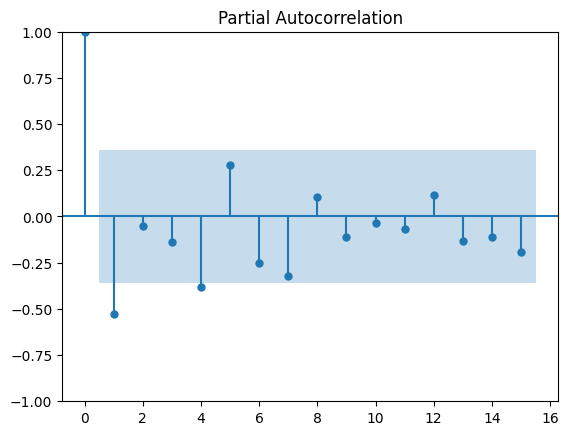

In [20]:
# Determinando o número máximo de lags permitido
max_lags = min(20, len(series_diff) // 2)

# Plotando ACF e PACF com lags ajustados
plot_acf(series_diff.dropna(), lags=max_lags)
plot_pacf(series_diff.dropna(), lags=max_lags)
plt.show()


                               SARIMAX Results                                
Dep. Variable:          Consumo (kWh)   No. Observations:                   30
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -90.326
Date:                Thu, 05 Dec 2024   AIC                            184.652
Time:                        13:30:44   BIC                            187.387
Sample:                    01-02-2023   HQIC                           185.509
                         - 01-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9998    136.289     -0.007      0.994    -268.120     266.121
sigma2        26.4324   3599.561      0.007      0.994   -7028.577    7081.442
Ljung-Box (L1) (Q):                   8.50   Jarque-

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


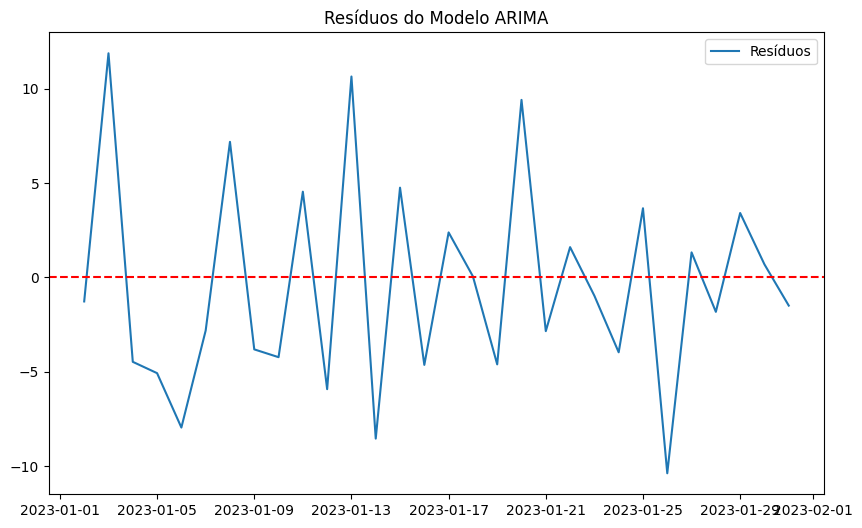

In [21]:
from statsmodels.tsa.arima.model import ARIMA

series.index = pd.date_range(start=series.index[0], end=series.index[-1], freq='D')

# Modelo ARIMA ajustado com a série (presumindo que já foi diferenciada para estacionariedade, se necessário)
model = ARIMA(series_diff, order=(0, 1, 1))  # Ajustando ARIMA(0, 0, 1)
arma_result = model.fit()

# Resumo do modelo ajustado
print(arma_result.summary())

# Visualizando resíduos
residuals = arma_result.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals, label="Resíduos")
plt.axhline(y=0, color="red", linestyle="--")
plt.title("Resíduos do Modelo ARIMA")
plt.legend()
plt.show()
